# Problem Statement

The dataset includes a range of attributes related to individuals' demographics, lifestyle choices, and health-related factors, aimed at predicting their obesity risk. The goal is to develop a multiclass classification model that can accurately predict an individual's obesity risk category based on their personal characteristics, dietary habits, physical activity, and other relevant factors.

This project is a competition on Kaggle, available at the following link:
https://www.kaggle.com/competitions/playground-series-s4e2/overview

# Data Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: This dataset is particularly well suited for visualizations, clustering, and general EDA. Show off your skills!

Below is a markdown table providing the description of the columns used for the multiclass prediction of obesity risk:

<table border="1">
  <tr>
    <th style="text-align: left;">Column</th>
    <th style="text-align: left;">Description</th>
  </tr>
  <tr>
    <td style="text-align: left;">id</td>
    <td style="text-align: left;">Unique identifier for each individual</td>
  </tr>
  <tr>
    <td style="text-align: left;">Gender</td>
    <td style="text-align: left;">Gender of the individual (e.g., Male, Female)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Age</td>
    <td style="text-align: left;">Age of the individual in years</td>
  </tr>
  <tr>
    <td style="text-align: left;">Height</td>
    <td style="text-align: left;">Height of the individual in centimeters</td>
  </tr>
  <tr>
    <td style="text-align: left;">Weight</td>
    <td style="text-align: left;">Weight of the individual in kilograms</td>
  </tr>
  <tr>
    <td style="text-align: left;">family_history_with_overweight</td>
    <td style="text-align: left;">Indicates whether the individual has a family history of overweight (Yes or No)</td>
  </tr>
  <tr>
    <td style="text-align: left;">FAVC</td>
    <td style="text-align: left;">Indicates whether the individual frequently consumes high-calorie food (Yes or No)</td>
  </tr>
  <tr>
    <td style="text-align: left;">FCVC</td>
    <td style="text-align: left;">Frequency of consumption of vegetables (Numeric value)</td>
  </tr>
  <tr>
    <td style="text-align: left;">NCP</td>
    <td style="text-align: left;">Number of main meals consumed per day (Numeric value)</td>
  </tr>
  <tr>
    <td style="text-align: left;">CAEC</td>
    <td style="text-align: left;">Consumption of food between meals (Categorical: Frequently, Sometimes, Always, No)</td>
  </tr>
  <tr>
    <td style="text-align: left;">SMOKE</td>
    <td style="text-align: left;">Indicates whether the individual smokes (Yes or No)</td>
  </tr>
  <tr>
    <td style="text-align: left;">CH2O</td>
    <td style="text-align: left;">Daily water consumption in liters (Numeric value)</td>
  </tr>
  <tr>
    <td style="text-align: left;">SCC</td>
    <td style="text-align: left;">Calories consumed from snacks between meals (Yes or No)</td>
  </tr>
  <tr>
    <td style="text-align: left;">FAF</td>
    <td style="text-align: left;">Physical activity frequency (Numeric value)</td>
  </tr>
  <tr>
    <td style="text-align: left;">TUE</td>
    <td style="text-align: left;">Time spent using technological devices (Numeric value)</td>
  </tr>
  <tr>
    <td style="text-align: left;">CALC</td>
    <td style="text-align: left;">Consumption of alcohol (Categorical: Frequently, Sometimes, Always, No)</td>
  </tr>
  <tr>
    <td style="text-align: left;">MTRANS</td>
    <td style="text-align: left;">Mode of transportation used by the individual (Categorical: Automobile, Bike, Public_Transportation, Walking)</td>
  </tr>
  <tr>
    <td style="text-align: left;">NObeyesdad</td>
    <td style="text-align: left;">Obesity risk category of the individual (Multiclass: 7 different categories based on BMI)</td>
  </tr>
</table>

# **Importing Libraries and Data**



In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , FunctionTransformer  , OrdinalEncoder
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier , IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score , confusion_matrix , accuracy_score


# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the Data
data_frame = pd.read_csv('/content/train.csv')

# Analysing the Data

In [ ]:
#Showing First five rows of the Data Frame
data_frame.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Shape of the given Data Frame
print( f'the Data consist of {data_frame.shape[0]} examples and {data_frame.shape[1]} features')

the Data consist of 20758 examples and 18 features


In [ ]:
#Information of the Data Frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
#counting the number of missing values
isnull = data_frame.isnull().sum()
print(isnull)

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


**There is no missing values in the Data set**


In [ ]:
#Describing Numerical Features
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [ ]:
#Describing Numerical Features
data_frame.describe(include = 'object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [ ]:
#removing redundant columns and rows
df = data_frame.drop(columns=['id'])
df = df.drop_duplicates()

In [ ]:
#numerical and categorical columns
categorical_features = df.select_dtypes(include = ['object']).columns
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns

In [ ]:
#categorical values
for i in categorical_features:
  print(f'{i}: {df[i].unique()}')

Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


### Ploting the Data

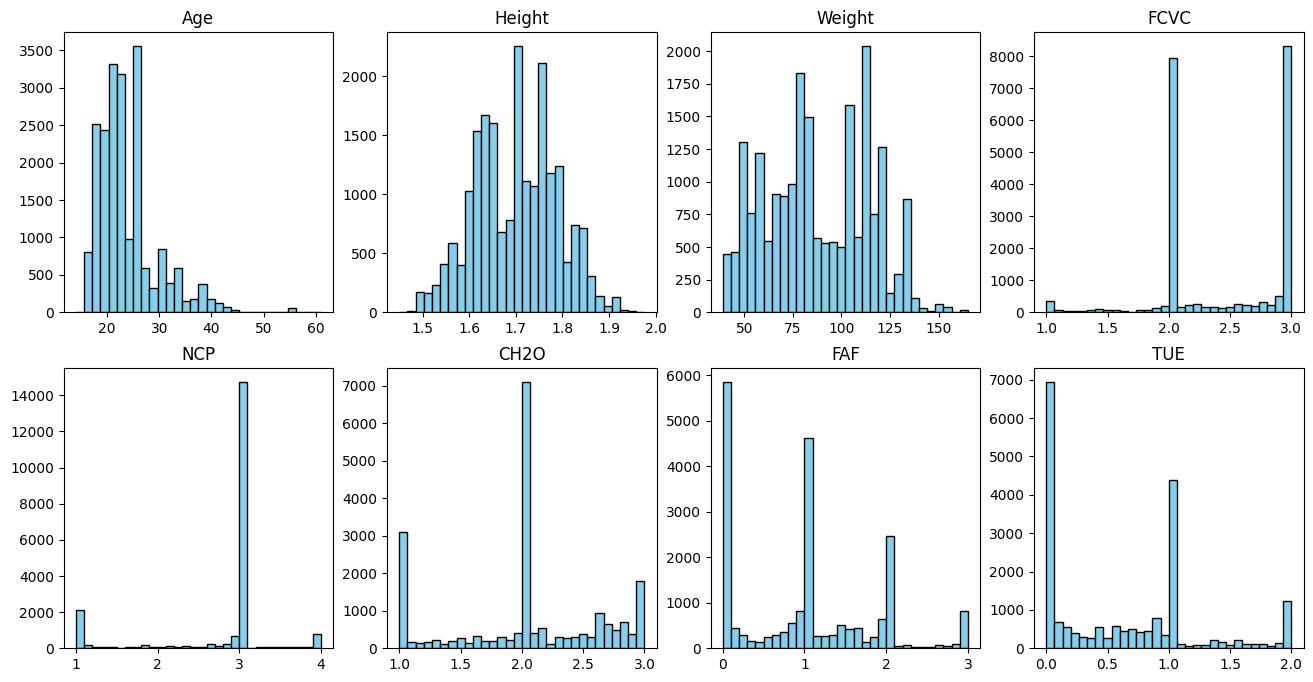

In [ ]:
#Plotting Histogram

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].hist(df[col], bins=30, edgecolor='black', color='skyblue')
    axes[i].set_title(col)

plt.show()

**Key Insights Gained from Analyzing the Histogram:**


1.   Age: The distribution appears to be slightly skewed towards younger
individuals, with a majority of the data points clustered between ages 18
and 30. The dataset contains a range of ages, but the bulk of the observations are concentrated in this younger age group.
2.   Height: The height distribution is somewhat symmetric, with most individuals having heights between 1.6 and 1.8 meters. There are fewer observations at the extremes of very short or very tall heights.
3.  Weight: The weight distribution is skewed right, indicating a            concentration of individuals with weights below 100 kg, but with some heavier individuals present. There is a long tail extending towards higher weights, which suggests a small portion of the population with much higher weights.







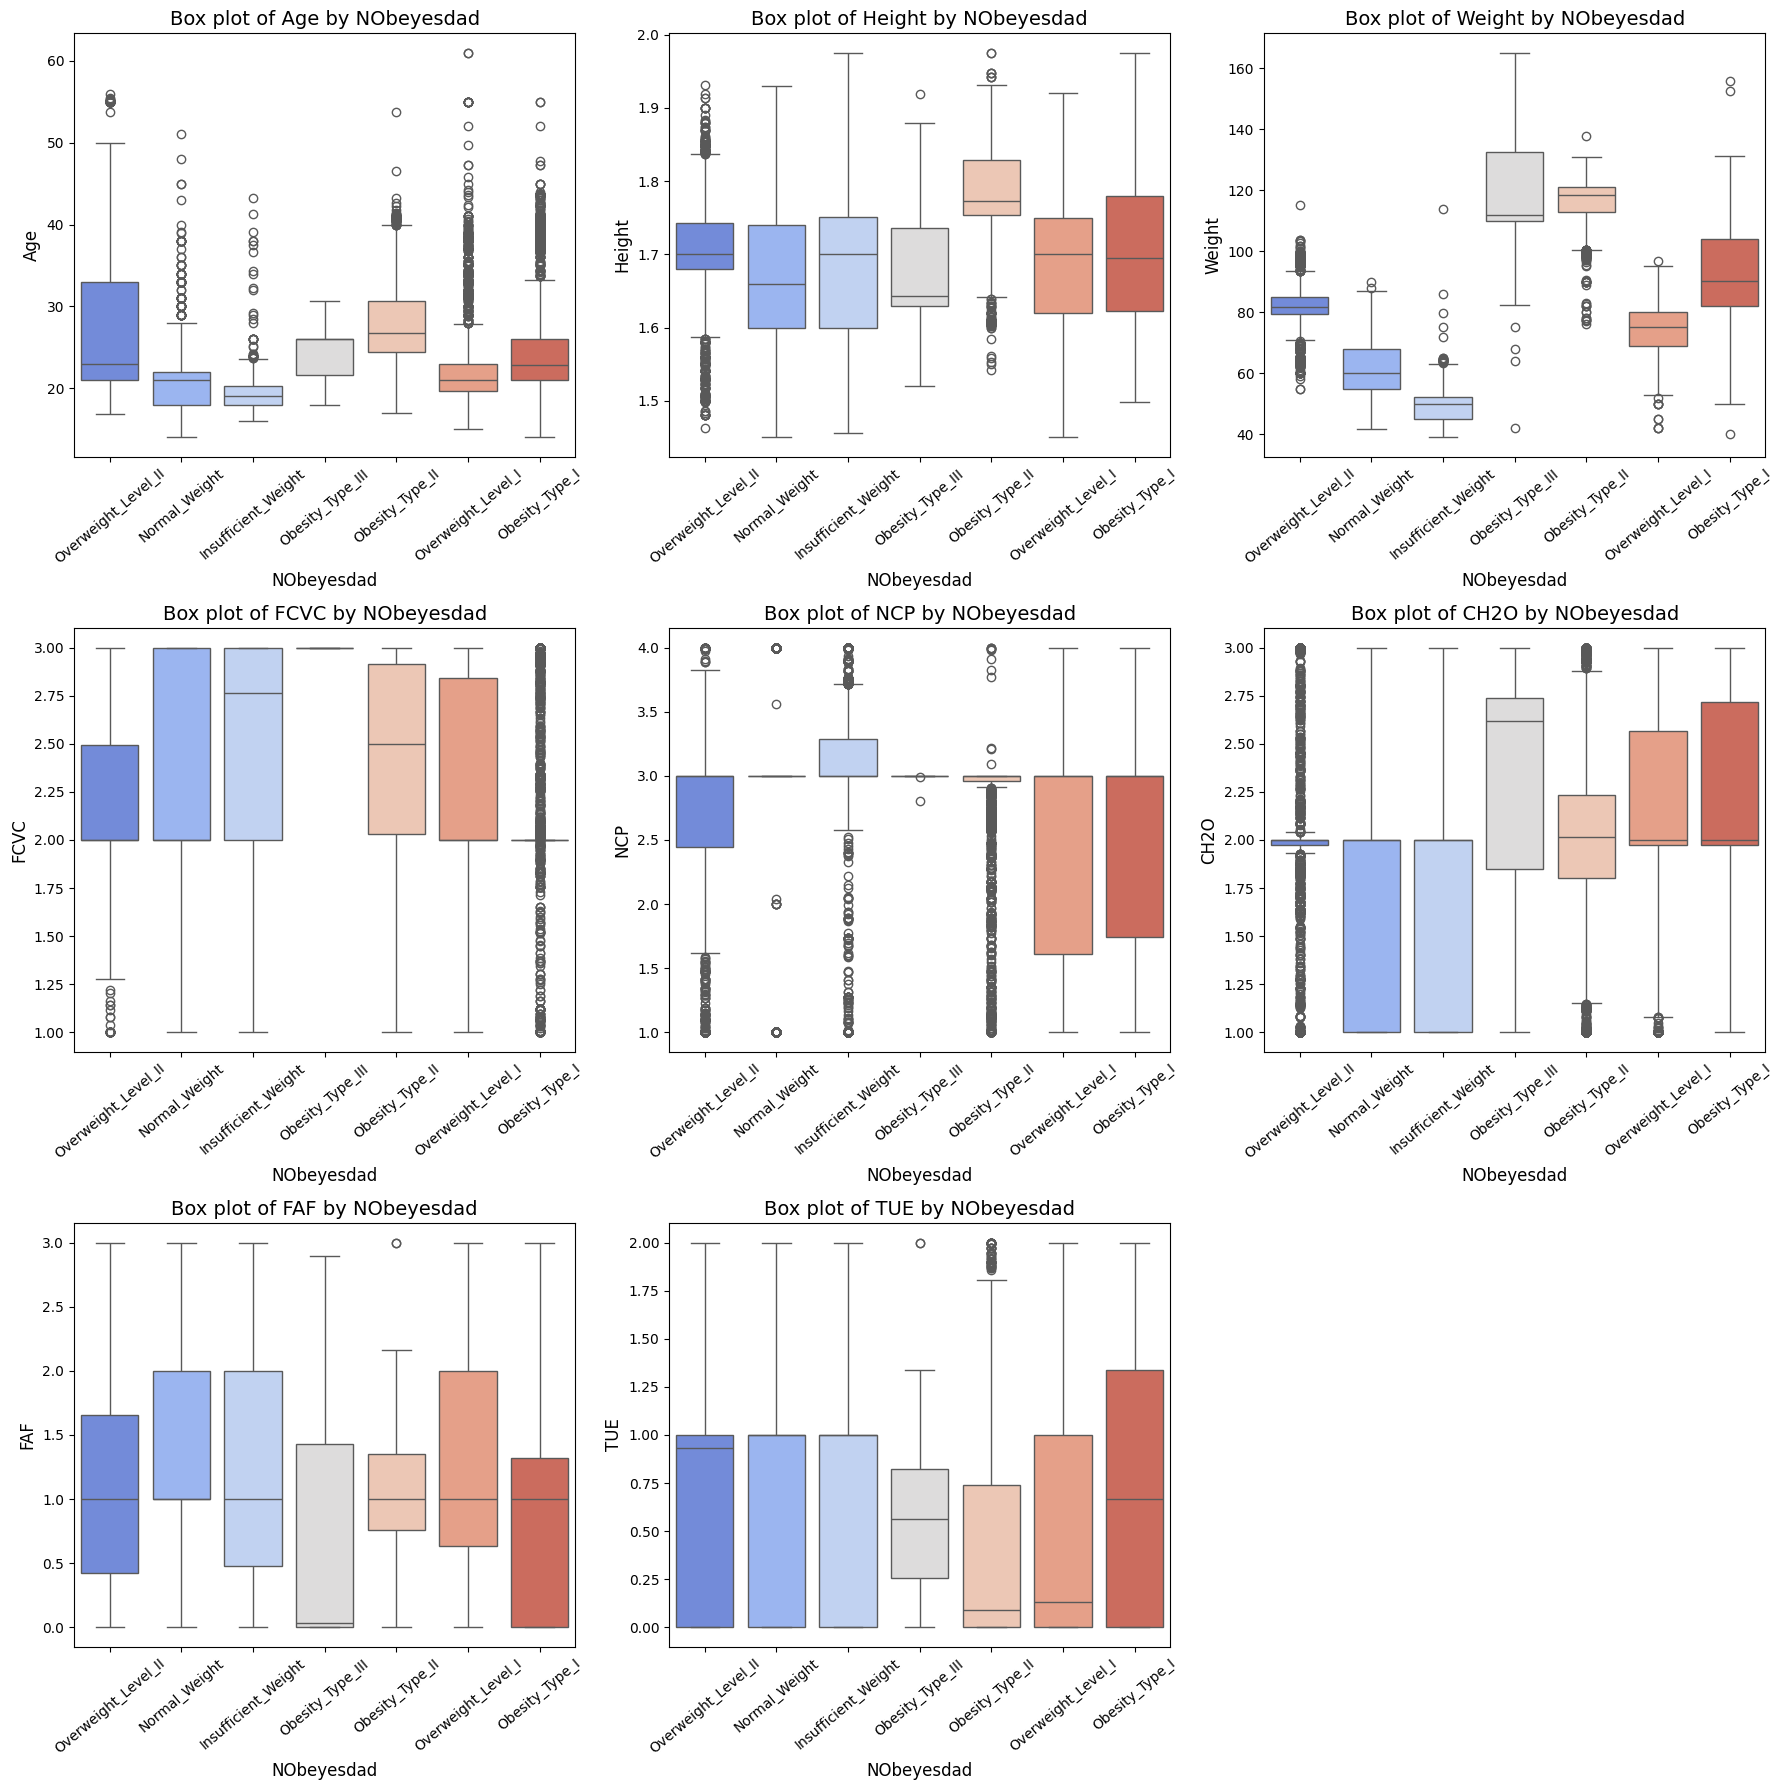

In [ ]:
# Ploting the Box plot

# Number of Features
n_features = len(numerical_features)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='NObeyesdad', y=feature, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=40)
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].set_xlabel('NObeyesdad', fontsize=12)
    axes[i].set_title(f"Box plot of {feature} by NObeyesdad", fontsize=14)

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Box Plot Evaluation:**

This chart shows that some features have unusual or outlier values that may require further investigation.

# **Preprocessing the Data**


### Making preprocessing pipeline

In [ ]:
#making numerical and categorical pipelines


numerical_pipeline = Pipeline([('Imputer' , SimpleImputer(strategy = 'mean')),
                                       ('Scaler'  , StandardScaler())])
categorical_pipeline = Pipeline([('MostFrequet' , SimpleImputer(strategy = 'most_frequent')),
                                          ('ordinal', OrdinalEncoder())])


#making total preprocessing pipeline using numercal and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [ ]:
# Applying the preprocessing to the data
transformed_data = preprocessor.fit_transform(df)

In [ ]:
#Converting transformed_data into a Pandas Data Frame
new_columns = list(numerical_features) + list(categorical_features)
scaled_data = pd.DataFrame(transformed_data, columns=new_columns)

In [ ]:
scaled_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,6.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,0.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,0.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,4.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,6.0


In [ ]:
# Splitting the scaled_data into features and targets
features = scaled_data.drop('NObeyesdad' , axis =1)
targets = scaled_data['NObeyesdad']

In [ ]:
#splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features,targets,
                                                    test_size=0.2,
                                                    random_state=42)

### Outlier Detection

In [ ]:
#Initializing and train the Isolation Forest model
iso_forest = IsolationForest(contamination= 0.01, random_state=42)
iso_forest.fit(x_train)

#Identifying outliers in the training data
outliers_train = iso_forest.predict(x_train)

#Counting the number of outliers
num_outliers = sum(outliers_train == -1)
num_normal = sum(outliers_train == 1)

print(f"Number of outliers detected: {num_outliers}")
print(f"Number of normal instances: {num_normal}")

#Removing the outliers from the training data
x_train_cleaned = x_train[outliers_train == 1]
y_train_cleaned = y_train[outliers_train == 1]

# Model training can be done using X_train_cleaned and y_train_cleaned

Number of outliers detected: 167
Number of normal instances: 16439


# **Training the Model**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_cleaned, y_train_cleaned)
y_pred_rf = rf_model.predict(x_test)

# Step 4: Train XGBoost model
XGBOOST = xgb.XGBClassifier(objective='multi:softmax', num_class=7)
XGBOOST.fit(x_train_cleaned, y_train_cleaned)
y_pred_xgb = XGBOOST.predict(x_test)

# Step 5: Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(x_train_cleaned, y_train_cleaned)
y_pred_catboost = catboost_model.predict(x_test)

# Step 6: Define function to calculate metrics
def print_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print('----------------------------')

# Step 7: Print metrics for each model
print_metrics(y_test, y_pred_rf, 'Random Forest')
print_metrics(y_test, y_pred_xgb, 'XGBoost')
print_metrics(y_test, y_pred_catboost, 'CatBoost')

Random Forest Metrics:
Accuracy: 0.8976
Precision: 0.8982
Recall: 0.8976
F1-Score: 0.8978
----------------------------
XGBoost Metrics:
Accuracy: 0.9049
Precision: 0.9052
Recall: 0.9049
F1-Score: 0.9050
----------------------------
CatBoost Metrics:
Accuracy: 0.9046
Precision: 0.9052
Recall: 0.9046
F1-Score: 0.9048
----------------------------


### Assessing feature importance and eliminating less significant features

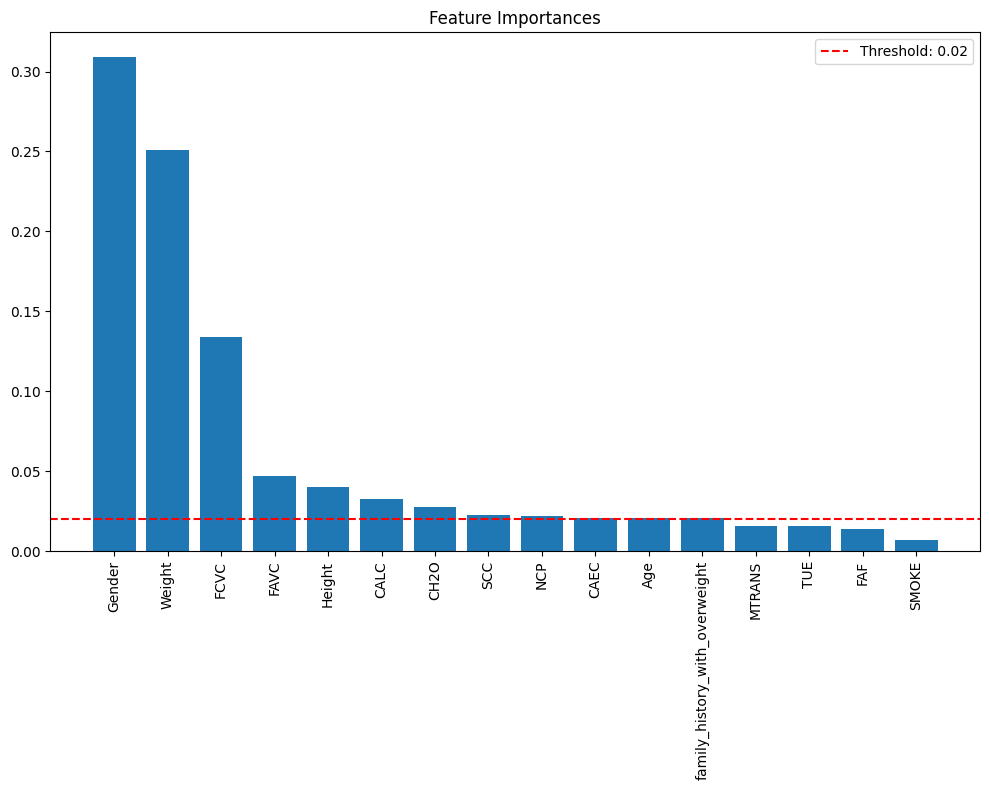

In [ ]:
# Evaluate Feature Importance in XGBoost
def plot_feature_importances(model, x, threshold=0.01):
    importance = model.feature_importances_
    indices = importance.argsort()[::-1]

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.title("Feature Importances")
    plt.bar(range(x.shape[1]), importance[indices], align="center")
    plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)

    # Draw a red dashed line for the threshold
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')

    plt.legend()
    plt.tight_layout()
    plt.show()

# Define a threshold to remove low importance features (for example, below 0.01 importance)
threshold = 0.02

# Plot the feature importances
plot_feature_importances(XGBOOST, x_train_cleaned, threshold)

important_features = [col for col, importance in zip(x_train_cleaned.columns, XGBOOST.feature_importances_) if importance > threshold]

# Filter the dataset based on the important features
X_filtered = x_train_cleaned[important_features]

# Split the filtered dataset into training and test sets
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_train_cleaned, test_size=0.2, random_state=42)

### Fine Tuning xgboost and Catboost models

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7)
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, n_iter=10, scoring='f1_weighted', cv=5, verbose=1, random_state=42)
random_search_xgb.fit(x_train_filtered, y_train_filtered)

best_xgb = random_search_xgb.best_estimator_

# Make predictions and print metrics
y_pred_xgb = best_xgb.predict(x_test_filtered)

print("XGBoost after fine-tuning:")
print_metrics(y_test_filtered, y_pred_xgb, 'XGBoost')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBoost after fine-tuning:
XGBoost Metrics:
Accuracy: 0.9063
Precision: 0.9060
Recall: 0.9063
F1-Score: 0.9059
----------------------------


In [ ]:
# Define CatBoost hyperparameter grid
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
}

# Fine-tune CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
random_search_catboost = RandomizedSearchCV(catboost_model, param_distributions=param_grid_catboost, n_iter=10, scoring='f1_weighted', cv=5, verbose=1, random_state=42)
random_search_catboost.fit(x_train_filtered, y_train_filtered)

# Get best CatBoost model
best_catboost = random_search_catboost.best_estimator_

# Make predictions and print metrics
y_pred_catboost = best_catboost.predict(x_test_filtered)

print("CatBoost after fine-tuning:")
print_metrics(y_test_filtered, y_pred_catboost, 'CatBoost')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CatBoost after fine-tuning:
CatBoost Metrics:
Accuracy: 0.9015
Precision: 0.9009
Recall: 0.9015
F1-Score: 0.9011
----------------------------


### Making an Ensemble Model using Weighted VotingClassifier


In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine fine-tuned models with weighted voting
ensemble_model = VotingClassifier(
    estimators=[('xgb', best_xgb), ('catboost', best_catboost)],
    voting='soft',
    weights=[0.6, 0.4]  #assigning weights to models
)

# Fit the model on the filtered training data
ensemble_model.fit(x_train_filtered, y_train_filtered)

# Predict on the filtered test and train data
y_pred_weighted_test = ensemble_model.predict(x_test_filtered)
y_pred_weighted_train = ensemble_model.predict(x_train_filtered)

# Evaluate the model on test data
print("Evaluation on Test Data:")
print_metrics(y_test_filtered, y_pred_weighted_test, 'Weighted Voting Model (Test Data)')

# Evaluate the model on train data
print("\nEvaluation on Train Data:")
print_metrics(y_train_filtered, y_pred_weighted_train, 'Weighted Voting Model (Train Data)')

# Checking for overfitting by comparing train and test accuracy
train_accuracy = accuracy_score(y_train_filtered, y_pred_weighted_train)
test_accuracy = accuracy_score(y_test_filtered, y_pred_weighted_test)

print(f'\nTrain Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy - test_accuracy > 0.05:
    print("\nWarning: The model may be overfitting.")
else:
    print("\nThe model does not show signs of overfitting.")

Evaluation on Test Data:
Weighted Voting Model (Test Data) Metrics:
Accuracy: 0.9075
Precision: 0.9069
Recall: 0.9075
F1-Score: 0.9071
----------------------------

Evaluation on Train Data:
Weighted Voting Model (Train Data) Metrics:
Accuracy: 0.9230
Precision: 0.9228
Recall: 0.9230
F1-Score: 0.9228
----------------------------

Train Accuracy: 0.9230
Test Accuracy: 0.9075

The model does not show signs of overfitting.
